# Assignment1 Perceptron Report
周澳蕾 11811337
### Generate dataset
+ Generate two Gaussian distributed datasets of points in $R^2$ and sample 200 points from each. 

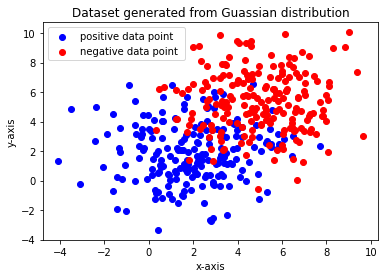

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from perceptron import *

# generate data 
mu1, mu2 = 2,5
sigma1, sigma2 = 2, 2
X1 = np.random.normal(mu1, sigma1, (200, 2))
X2 = np.random.normal(mu2, sigma2, (200, 2))

# plot data set
plt.scatter(x=X1[:,0], y=X1[:,1], c='blue', label='positive data point')
plt.scatter(x=X2[:,0], y=X2[:,1], c='red', label='negative data point ')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.title('Dataset generated from Guassian distribution')
plt.show()
plt.close()

### Split & Shuffle
+ split to the training set and testing set, 160 for training, 40 for testing.
+ combine data and shuffle
+ train the perceptron on the training dataset and calculate the training accuracy and testing accuracy while training.

In [2]:
X_train, y_train, X_test, y_test = generate_data(X1, X2)
# R^2 space dimension = 2, sample size = 200*2(train:test=320:80

perceptron = Perceptron(320)
train_accu, test_accu = perceptron.train(X_train, y_train, X_test, y_test)

### Analyze prediction result and accuracy
+ print the train scatter graph
+ print the line graph of training and testing accuracy

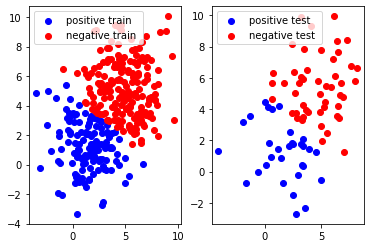

In [3]:
pos_train, neg_train = perceptron.get_predict(X_train, y_train)
pos_test, neg_test = perceptron.get_predict(X_test, y_test)
fig1 = plt.subplot(1, 2, 1)
fig2 = plt.subplot(1, 2, 2)

fig1.scatter(x=pos_train[:,0], y=pos_train[:,1], c='blue', label='positive train')
fig1.scatter(x=neg_train[:,0], y=neg_train[:,1], c='red', label='negative train ')
fig1.legend(loc='upper left')

fig2.scatter(x=pos_test[:,0], y=pos_test[:,1], c='blue', label='positive test')
fig2.scatter(x=neg_test[:,0], y=neg_test[:,1], c='red', label='negative test ')
fig2.legend(loc='upper left')
plt.show()
# fig2.close()

We can see intuitively training set and testing set are mostly separated correctly.

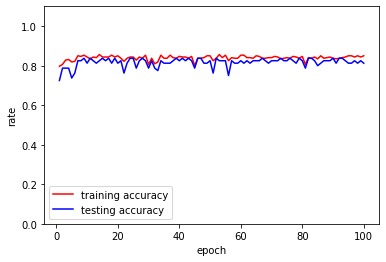

Final test accuracy: 0.8125


In [4]:
x_axis = [i for i in range(1, len(train_accu) + 1)]
plt.ylim(0,1.1)
plt.plot(x_axis, train_accu, c='red', label='training accuracy')
plt.plot(x_axis, test_accu, c='blue', label='testing accuracy')
plt.legend(loc='lower left')
plt.xlabel('epoch')
plt.ylabel('rate')
plt.show()
print('Final test accuracy: {}'.format(test_accu[-1]))

### Analyze the accuracy with different means and variances
With the difference of the two means increasing, the accuracy of the perceptron increases.

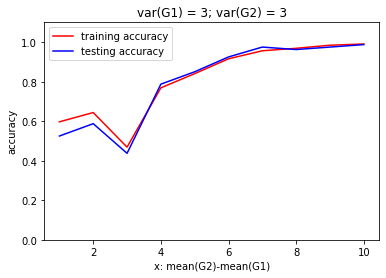

In [5]:
mu1, mu2 = 1,1
sigma1, sigma2 = 3, 3
accu_train = []
accu_test = []
for _ in range(10):
    mu2+=1
    X1 = np.random.normal(mu1, sigma1, (200, 2))
    X2 = np.random.normal(mu2, sigma2, (200, 2))
    X_train, y_train, X_test, y_test = generate_data(X1, X2)

    perceptron = Perceptron(320)
    train_accu, test_accu = perceptron.train(X_train, y_train, X_test, y_test)
    accu_train.append(train_accu[-1])
    accu_test.append(test_accu[-1])

x_axis = [i for i in range(1, 11)]
plt.ylim(0,1.1)
plt.plot(x_axis, accu_train, c='red', label='training accuracy')
plt.plot(x_axis, accu_test, c='blue', label='testing accuracy')
plt.title('var(G1) = 3; var(G2) = 3')
plt.xlabel('x: mean(G2)-mean(G1)')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

With variance increasing, the accuracy of perceptron decreases.

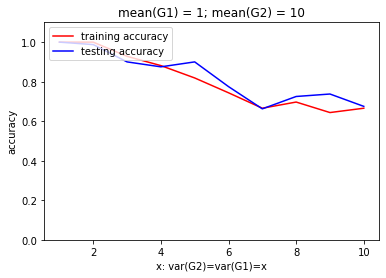

In [6]:
mu1, mu2 = 1,8
sigma1, sigma2 = 0, 0
accu_train = []
accu_test = []
for _ in range(10):
    sigma1+=1
    sigma2+=1
    X1 = np.random.normal(mu1, sigma1, (200, 2))
    X2 = np.random.normal(mu2, sigma2, (200, 2))
    X_train, y_train, X_test, y_test = generate_data(X1, X2)

    perceptron = Perceptron(320)
    train_accu, test_accu = perceptron.train(X_train, y_train, X_test, y_test)
    accu_train.append(train_accu[-1])
    accu_test.append(test_accu[-1])

x_axis = [i for i in range(1, 11)]
plt.ylim(0,1.1)
plt.plot(x_axis, accu_train, c='red', label='training accuracy')
plt.plot(x_axis, accu_test, c='blue', label='testing accuracy')
plt.title('mean(G1) = 1; mean(G2) = 10')
plt.xlabel('x: var(G2)=var(G1)=x')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

We find that:
+ the closer of the means of two Gaussian Distribution 
+ the bigger of the variance
the higher the confusion level of the data is. In another word, more data points are mixed in our two-dimensional space, which means it is more inaccurate for a linear perceptron to be classified.
Conclusion: With closer means and higher variance, the accuracy of the perception predicted decreases.